In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [20]:
cat_cols=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]

In [21]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
y_train=y_train.reshape(-1,)

In [28]:
def get_plot(X,y,index):
 plt.figure(figsize=(15,2))
 plt.imshow(X[index])
 plt.xlabel(cat_cols[y[index]])
 plt.show() 

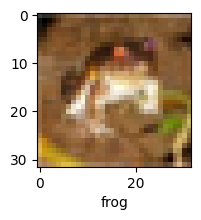

In [24]:
get_plot(X_train,y_train,0)

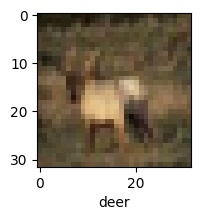

In [29]:
get_plot(X_train,y_train,3)

In [30]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [31]:
X_train.shape

(50000, 32, 32, 3)

**Using Simple Neural Network**

In [33]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 150s 95ms/step - loss: 1.8090 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6215 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.5383 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4799 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4302 - accuracy: 0.4963


In [35]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.4764 - accuracy: 0.4745


[1.4763892889022827, 0.47450000047683716]

In [36]:
y_pred=ann.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [40]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [41]:
y_pred_classes

array([3, 9, 8, ..., 3, 5, 7], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.36      0.47      1000
           1       0.58      0.61      0.60      1000
           2       0.51      0.18      0.26      1000
           3       0.32      0.45      0.37      1000
           4       0.50      0.32      0.39      1000
           5       0.42      0.31      0.36      1000
           6       0.50      0.56      0.53      1000
           7       0.54      0.52      0.53      1000
           8       0.47      0.76      0.58      1000
           9       0.43      0.68      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



***Now Using CNN***

In [45]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.5319 - accuracy: 0.4403
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1772 - accuracy: 0.5847
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.0147 - accuracy: 0.6430
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9262 - accuracy: 0.6760
Epoch 5/5
1563/1563 [==============================] - 96s 61ms/step - loss: 0.8568 - accuracy: 0.6992


In [46]:
cnn.evaluate(X_test,y_test)
y_pred=cnn.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 8s 24ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.84      0.77      0.80      1000
           2       0.64      0.47      0.54      1000
           3       0.50      0.49      0.49      1000
           4       0.65      0.62      0.64      1000
           5       0.51      0.69      0.59      1000
           6       0.84      0.68      0.75      1000
           7       0.73      0.71      0.72      1000
           8       0.72      0.85      0.78      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



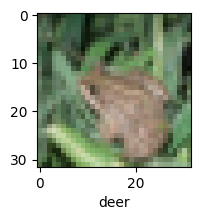

In [52]:
get_plot(X_test,y_pred_classes,4)